<a href="https://colab.research.google.com/github/f-marcondes/QuarentenaDados-aula1/blob/master/QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indrodução

In [112]:
print("Fellipe Marcondes")

Fellipe Marcondes


# Lendo os dados do MovieLens

Importar Pandas

In [0]:
import pandas as pd

Importar csv dos filmes

In [117]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Importar csv avaliações de filmes

In [118]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [119]:
avaliacoes.shape

(100836, 4)

In [120]:
len(avaliacoes)

100836

Renomeando nomes das colunas

In [121]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Separando avaliacoes do filme 1

In [122]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [123]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [124]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [125]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Media apenas das notas

In [126]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [127]:
avaliacoes["nota"].mean()

3.501556983616962

In [128]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [129]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Juntar notas medias com base de dados

In [130]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [131]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [132]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [133]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


# Plotando grafico

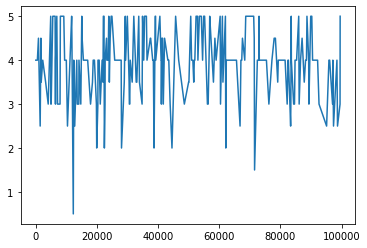

In [134]:
avaliacoes.query("filmeId == 1")["nota"].plot()

adequando o grafico

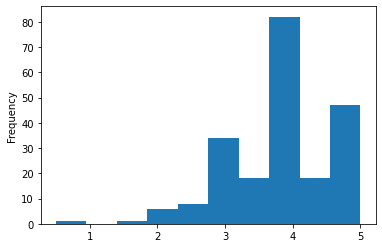

In [135]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist")

Colocando titulo no grafico

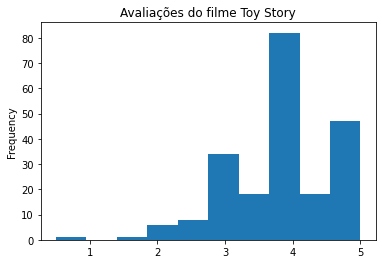

In [136]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist", title="Avaliações do filme Toy Story")

Adidionando matplotlib para manipular graficos


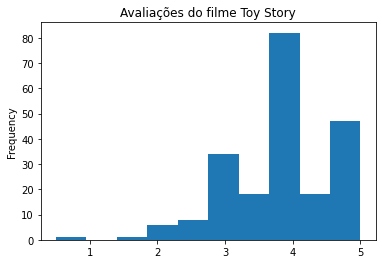

In [137]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist")
plt.title("Avaliações do filme Toy Story")
plt.show()

Plotando outros filmes

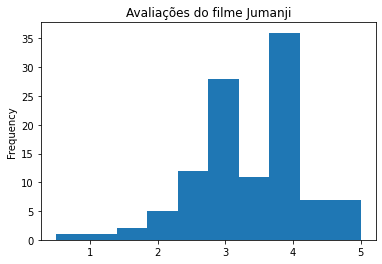

In [138]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind="hist", title="Avaliações do filme Jumanji")

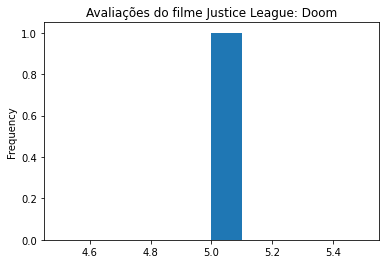

In [139]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist", title="Avaliações do filme Justice League: Doom")

# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [140]:
filmes_com_media.sort_values("nota", ascending=False, na_position="first").head(18)

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [169]:
filmes_com_media.name = "nota media"
filmes_com_media.head()

,filmeId,titulo,genero,nota media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [142]:
#len(avaliacoes["nota"])
avaliacoes["nota"].count()

100836

In [143]:
quantidade_notas_filme_1 = avaliacoes_do_filme_1["nota"].count()
quantidade_notas_filme_1

215

In [170]:
quantidade_notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
quantidade_notas_por_filme.name = "quantidade votos"
filmes_com_quantidade = filmes_com_media.join(quantidade_notas_por_filme, on="filmeId")
filmes_com_quantidade.head()

,filmeId,titulo,genero,nota media,quantidade votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [172]:
filmes_com_quantidade["nota media"] = filmes_com_quantidade["nota media"].round(decimals = 2)
filmes_com_quantidade.head()


,filmeId,titulo,genero,nota media,quantidade votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 5 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [203]:
genero_filmes = filmes_com_quantidade["genero"].str.split("|")
#genero_filmes
genero_filmes_unico = []
for genero in genero_filmes:
  for unico in genero:
    if unico not in genero_filmes_unico:
      genero_filmes_unico.append(unico)
for genero in genero_filmes_unico:
  print(genero)

Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
War
Musical
Documentary
IMAX
Western
Film-Noir
(no genres listed)


# Desafio 6 da Thais André
Contar o número de aparições de cada genero.

In [195]:
quantidade_por_genero = pd.Series(np.concatenate(genero_filmes)).value_counts()
quantidade_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

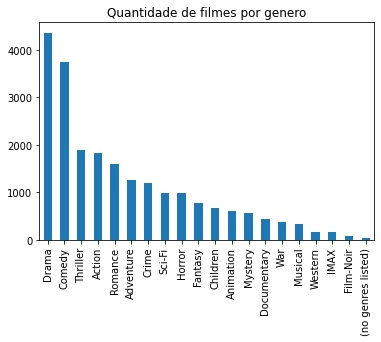

In [201]:
quantidade_por_genero.plot(kind="bar")
plt.title("Quantidade de filmes por genero")
plt.show()